# Name: Gabriel Appleby

# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [2]:
# A bit of setup

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from implementations.b_neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `implementations/b_neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = np.float32(10 * np.random.randn(num_inputs, input_size))
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `implementations/neural_net.py` and look at the method `TwoLayerNet.compute_scores`. 

Implement the forward pass which uses the weights and biases to compute the scores for all inputs.

In [4]:
nclasses = 3
session = tf.Session()
session.run(tf.global_variables_initializer())
scores = session.run(net.compute_scores(X))

print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.array([[-0.8048996, -1.2701722,  -0.69626933],
 [-0.16263291, -1.1806408,  -0.4659379, ],
 [-0.50724095, -1.006151,   -0.843255,  ],
 [-0.14552905, -0.4789041,  -0.5218529, ],
 [ 0.00391591, -0.11607306, -0.14394382]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.8123374  -1.2765464  -0.7033599 ]
 [-0.17129675 -1.1880331  -0.47310448]
 [-0.5159048  -1.0135431  -0.85042155]
 [-0.15419288 -0.48629636 -0.5290195 ]
 [-0.00618732 -0.12435262 -0.15226948]]

correct scores:
[[-0.8048996  -1.2701722  -0.69626933]
 [-0.16263291 -1.1806408  -0.4659379 ]
 [-0.50724095 -1.006151   -0.843255  ]
 [-0.14552905 -0.4789041  -0.5218529 ]
 [ 0.00391591 -0.11607306 -0.14394382]]

Difference between your scores and correct scores:
0.11727886888984684


# Forward pass: compute loss
Implement the functions `softmax_loss`, and `compute_objective`.

In [5]:
objective = net.compute_objective(X, y, reg=0.05)
np_obj = session.run(objective)


correct_objective = 6.3694286

# should be very small, we get < 1e-7
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(np_obj - correct_objective)))

Difference between your loss and correct loss:
0.0022120129333496052


# Backward pass
Tensorflow takes care of the backpropagation, so we are ready to train the neural network!

# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.00345471


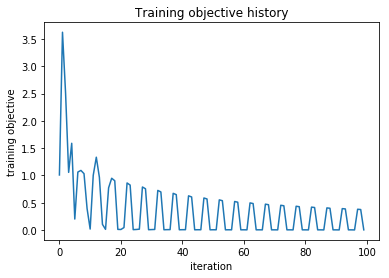

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False, batch_size = 1)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training objective')
plt.title('Training objective history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

X_train = np.float32(X_train)
X_val = np.float32(X_val)
X_test = np.float32(X_test)

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-5, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
print(X_val.shape)
val_acc = np.float32(np.equal(net.predict(X_val), y_val)).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 460.515076
iteration 100 / 1000: loss 353.719604
iteration 200 / 1000: loss 327.228516
iteration 300 / 1000: loss 336.467865
iteration 400 / 1000: loss 331.585175
iteration 500 / 1000: loss 306.515320
iteration 600 / 1000: loss 297.812988
iteration 700 / 1000: loss 310.508301
iteration 800 / 1000: loss 331.703491
iteration 900 / 1000: loss 292.801422
(1000, 3072)
Validation accuracy:  0.488


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.4 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

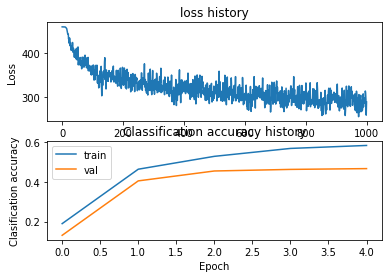

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

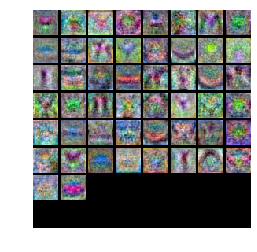

In [10]:
from vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(learned_params):
    
    W1 = learned_params['W1']
    
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

learned_params = net.get_learned_parameters()
show_net_weights(learned_params)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [11]:
best_net = None # store the best model into this 


#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################

# Don't actually try to run this through jupyter notebook...
# hidden_size_list = [8, 16, 32, 64, 128]
# reg_list = [.25, .5, .75, 1]
# learning_rate_decay_list = [.85, .9, .95, 1]
# num_iterations_list = [100, 1000, 10000]
# learning_rate_list = [1e-3, 1e-5, 1e-7]

# best_test_acc = -999999

# for learn_rate in learning_rate_list:
#     for num_iterations in num_iterations_list:
#         for hidden_size in hidden_size_list:
#             for reg in reg_list:
#                 for decay in learning_rate_decay_list:
#                     net = TwoLayerNet(input_size, hidden_size, num_classes)

#                     # Train the network
#                     stats = net.train(X_train, y_train, X_val, y_val,
#                                 num_iters=num_iterations, batch_size=200,
#                                 learning_rate=1e-5, learning_rate_decay=decay,
#                                 reg=reg, verbose=True)

#                     test_acc = (net.predict(X_test) == y_test).mean()
#                     if test_acc > best_test_acc:
#                         # Predict on the validation set
#                         print(X_val.shape)
#                         val_acc = np.float32(
#                             np.equal(net.predict(X_val), y_val)).mean()
#                         print('Validation accuracy: ', val_acc)
#                         print('Test accuracy: ', test_acc)
#                         print("Using: " + str(num_iterations) + ". " + str(hidden_size) + ". " + str(reg) + ". " + "lr " + str(learn_rate) + ". " + str(decay))
#                         best_test_acc = test_acc
#                         best_net = net
#                     tf.reset_default_graph()

best_net = TwoLayerNet(input_size, 128, num_classes)

# Train the network
stats = best_net.train(X_train, y_train, X_val, y_val,
            num_iters=10000, batch_size=200,
            learning_rate=.00001, learning_rate_decay=0.85,
            reg=0.75, verbose=True)
                    

#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 10000: loss 460.509735
iteration 100 / 10000: loss 353.856171
iteration 200 / 10000: loss 323.319733
iteration 300 / 10000: loss 329.582581
iteration 400 / 10000: loss 315.965027
iteration 500 / 10000: loss 296.211090
iteration 600 / 10000: loss 281.980316
iteration 700 / 10000: loss 299.974609
iteration 800 / 10000: loss 313.005005
iteration 900 / 10000: loss 279.039734
iteration 1000 / 10000: loss 298.288879
iteration 1100 / 10000: loss 240.437927
iteration 1200 / 10000: loss 262.203094
iteration 1300 / 10000: loss 276.203766
iteration 1400 / 10000: loss 232.490326
iteration 1500 / 10000: loss 244.160019
iteration 1600 / 10000: loss 216.497192
iteration 1700 / 10000: loss 224.932907
iteration 1800 / 10000: loss 232.162231
iteration 1900 / 10000: loss 231.569550
iteration 2000 / 10000: loss 217.739944
iteration 2100 / 10000: loss 231.277847
iteration 2200 / 10000: loss 248.451263
iteration 2300 / 10000: loss 229.235947
iteration 2400 / 10000: loss 220.137955
iteration 25

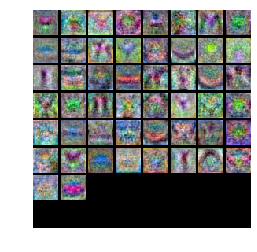

In [12]:
# visualize the weights of the best network
learned_params = net.get_learned_parameters()
show_net_weights(learned_params)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [13]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.572
